# Unit 5 - Financial Planning


In [33]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables
load_dotenv("paca.env")

True

Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2 
my_eth = 5.3

In [19]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json

In [20]:
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $30746.00
The current value of your 5.3 ETH is $1302.55


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [23]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-01-25", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.index = df_portfolio.index.date
df_portfolio

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2021-01-25  117.39  117.56  117.36  117.54  3977366  383.67  384.77  378.46   

                             
            close    volume  
2021-01-25  384.4  61090775

In [24]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [25]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,43798.715
shares,42728.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

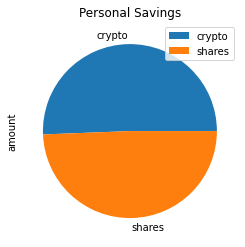

In [27]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your fund.")
elif total_saving == emergency_fund:
    print("Congratulations! You've reached your savings goal.")
else:
          print("You are {total_savings - emergency_fund} away from your savings goal.")

Congratulations! You have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date
).df
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                            SPY          \
              open      high       low   close     volume    open    high   
2016-01-25  108.95  108.9800  108.7700  108.79  3120189.0  189.93  190.15   
2016-01-26  108.90  108.9950  108.7699  108.90  2023631.0  188.42  190.53   
2016-01-27  108.91  109.0100  108.7200  108.95  1531148.0  189.58  191.56   
2016-01-28  108.99  109.0988  108.8201  109.04  2146566.0  189.96  190.20   
2016-01-29  109.41  109.4800  109.2500  109.32  7404827.0  190.02  193.75   

                                       
               low   close     volume  
2016-01-25  187.41  187.66   99219694  
2016-01-26  188.02  190.18  115312517  
2016-01-27  187.06  188.12  157060622  
2016-01-28  187.16  189.14  118949268  
2016-01-29  189.88  193.69  145410523

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*30
)

In [41]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                                      \
              open      high       low   close     volume daily_return   
2016-01-25  108.95  108.9800  108.7700  108.79  3120189.0          NaN   
2016-01-26  108.90  108.9950  108.7699  108.90  2023631.0     0.001011   
2016-01-27  108.91  109.0100  108.7200  108.95  1531148.0     0.000459   
2016-01-28  108.99  109.0988  108.8201  109.04  2146566.0     0.000826   
2016-01-29  109.41  109.4800  109.2500  109.32  7404827.0     0.002568   

               SPY                                                  
              open    high     low   close     volume daily_return  
2016-01-25  189.93  190.15  187.41  187.66   99219694          NaN  
2016-01-26  188.42  190.53  188.02  190.18  115312517     0.013429  
2016-01-27  189.58  191.56  187.06  188.12  157060622    -0.010832  
2016-01-28  189.96  190.20  187.16  189.14  118949268     0.005422  
2016-01-29  190.02  193.75  189.88  193.69  145410523     0.024056

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004662,0.993628,0.989191,1.004395,0.987862,1.004809,0.993657,0.988934,0.999384,1.001335,...,0.999231,1.002959,1.006618,0.995445,1.006023,1.013932,1.004820,1.012084,1.002091,1.002653
2,1.005346,0.993793,0.984632,1.006562,0.974917,1.002852,0.994721,0.989351,1.010833,1.003861,...,1.003071,0.994429,0.999473,1.012953,1.004105,1.014507,0.994529,1.017119,1.006894,1.010679
3,1.008055,0.997836,0.986755,1.014002,0.971930,0.995512,0.995267,0.990771,1.012633,1.004707,...,1.003900,0.992439,0.993034,1.016824,1.008737,1.015465,0.986648,1.019410,1.010737,1.010341
4,1.000339,1.007749,1.000976,1.011113,0.963140,1.009403,1.002824,1.008548,1.019158,1.011430,...,1.019466,1.001384,0.991676,1.006381,1.011853,1.021653,0.994685,1.019620,1.019310,1.013083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.425695,38.565233,23.877346,35.558007,10.115429,23.337850,13.999737,45.206911,60.832167,25.387613,...,21.944542,8.973274,26.233136,13.513202,10.126692,31.198448,13.756233,14.403381,25.284743,27.598821
7557,28.999264,38.524810,23.972604,35.094403,10.081221,23.244570,14.000860,45.024039,61.029683,25.307483,...,22.131593,8.803252,26.312998,13.388403,10.149588,31.487895,13.767621,14.281494,25.704270,27.874173
7558,28.863697,38.303189,23.832681,34.878190,10.103284,23.236373,13.898753,44.497838,60.659950,25.226976,...,21.959700,8.825944,26.139792,13.327614,10.201792,31.533511,13.716298,14.417272,25.656583,27.789379
7559,29.018059,38.112835,23.691321,34.346888,10.205248,23.188029,13.987442,44.642330,60.801123,25.401336,...,21.806430,8.798905,26.035510,13.303897,10.032503,31.632443,13.697494,14.531690,25.811875,27.654608


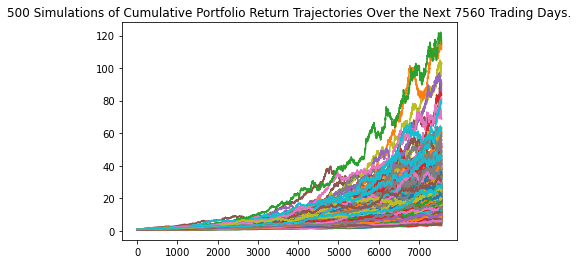

In [43]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

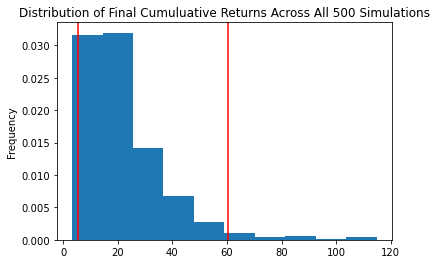

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.000339
std              15.467047
min               3.274742
25%              11.683802
50%              18.093422
75%              27.293264
max             114.766292
95% CI Lower      5.517379
95% CI Upper     60.352317
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [51]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $110347.58 and $1207046.35


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [73]:
# Set initial investment
increased_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $29719.4 and $81491.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim_five = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*5
)

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004689,1.007899,1.009307,1.014080,0.995124,1.005096,0.989559,1.000795,1.003588,0.987695,...,1.000756,0.997612,1.008754,0.994959,1.014100,0.994314,0.990417,0.999718,1.009133,0.990749
2,1.004605,1.020136,1.008708,1.026180,0.998780,1.016597,0.999037,0.996764,1.008883,0.978892,...,0.999859,0.988577,1.007208,0.995098,1.023168,0.990641,0.980370,0.997160,0.999612,0.997854
3,1.010156,1.023006,1.015521,1.022523,0.997491,1.007690,1.012082,1.009715,1.015255,0.973209,...,1.002134,0.972839,1.007015,0.999788,1.027425,0.992734,0.984685,1.007989,0.994429,0.998448
4,1.015782,1.028172,1.000325,1.029722,0.993820,1.015513,1.016571,1.021848,1.009190,0.970090,...,1.005378,0.961677,1.002547,1.005475,1.026754,0.998453,0.971880,1.006188,1.001430,0.999682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.787171,1.623189,1.994416,1.332507,1.155258,1.934646,1.668027,2.302295,1.839894,1.223917,...,1.455103,2.111093,2.261467,1.248849,1.322399,1.736724,1.376515,1.644586,1.803007,1.731925
1257,1.778185,1.648899,2.002453,1.318387,1.155050,1.943558,1.651720,2.306333,1.850873,1.207951,...,1.466983,2.099193,2.271941,1.246244,1.321035,1.725896,1.384687,1.654885,1.794521,1.716661
1258,1.777134,1.648174,2.000140,1.305454,1.151775,1.922702,1.671653,2.317894,1.832457,1.194119,...,1.465474,2.095138,2.299340,1.256243,1.314309,1.738640,1.385261,1.647722,1.779556,1.715773
1259,1.791566,1.652379,1.990442,1.297455,1.141452,1.931775,1.656616,2.345321,1.824203,1.195457,...,1.468633,2.092495,2.312771,1.257105,1.314506,1.737845,1.385820,1.650664,1.760008,1.724436


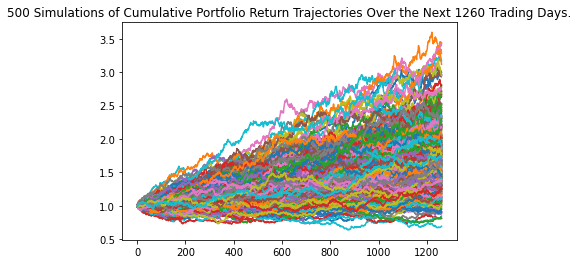

In [57]:
# Plot simulation outcomes
line_plot_five = MC_sim_five.plot_simulation()

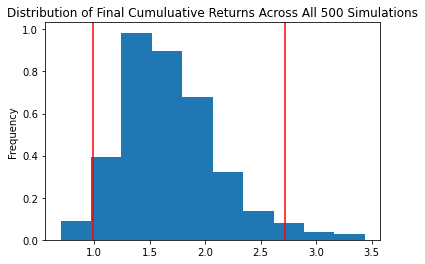

In [58]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim_five.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_sim_five.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.683051
std               0.446474
min               0.695703
25%               1.368966
50%               1.620328
75%               1.925036
max               3.439538
95% CI Lower      0.990647
95% CI Upper      2.716373
Name: 1260, dtype: float64


In [72]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59438.81 and $162982.35


### Ten Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_sim_ten = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*10
)
MC_sim_ten.portfolio_data.head()

AGG                                                      \
              open      high       low   close     volume daily_return   
2016-01-25  108.95  108.9800  108.7700  108.79  3120189.0          NaN   
2016-01-26  108.90  108.9950  108.7699  108.90  2023631.0     0.001011   
2016-01-27  108.91  109.0100  108.7200  108.95  1531148.0     0.000459   
2016-01-28  108.99  109.0988  108.8201  109.04  2146566.0     0.000826   
2016-01-29  109.41  109.4800  109.2500  109.32  7404827.0     0.002568   

               SPY                                                  
              open    high     low   close     volume daily_return  
2016-01-25  189.93  190.15  187.41  187.66   99219694          NaN  
2016-01-26  188.42  190.53  188.02  190.18  115312517     0.013429  
2016-01-27  189.58  191.56  187.06  188.12  157060622    -0.010832  
2016-01-28  189.96  190.20  187.16  189.14  118949268     0.005422  
2016-01-29  190.02  193.75  189.88  193.69  145410523     0.024056

In [64]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_sim_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009769,0.996407,0.999837,0.992700,0.991371,1.008666,0.998855,1.005377,1.004533,0.999247,...,1.013028,1.007093,1.009659,0.999166,0.992497,0.996665,0.997161,1.007580,0.986487,0.986987
2,1.015308,0.997548,1.003331,0.998866,1.001252,1.011508,0.987318,0.999550,1.016203,0.997883,...,1.026637,1.007406,0.994909,0.988987,0.976463,0.998177,0.997349,1.025278,0.988855,0.984661
3,1.004096,1.002713,1.005260,0.986104,1.009565,1.017777,0.991588,1.006795,1.019787,1.008562,...,1.029762,1.008451,0.994917,0.992245,0.978630,0.992484,0.992061,1.028742,0.980659,0.970421
4,1.000060,0.994731,1.013329,0.978459,1.004907,1.028860,1.002347,1.011193,1.008063,0.998569,...,1.033804,1.008620,1.003881,1.001387,0.966290,0.992222,0.995681,1.030958,0.988842,0.973232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.057059,2.204719,3.503110,3.546535,2.750584,4.923570,3.365386,1.811739,2.965307,3.306452,...,2.842536,1.678450,1.303959,1.250782,2.080359,2.017837,3.190076,3.519528,2.097099,2.294044
2517,2.059925,2.196276,3.491195,3.560245,2.755299,5.013627,3.329212,1.814268,3.006497,3.317880,...,2.833904,1.691742,1.315232,1.252123,2.088593,1.988997,3.178755,3.512757,2.097610,2.287923
2518,2.015439,2.178550,3.468499,3.569606,2.736661,4.966244,3.382083,1.792708,2.979884,3.327561,...,2.834208,1.695016,1.296700,1.245099,2.076395,2.002796,3.171665,3.514853,2.107921,2.260621
2519,2.044196,2.207571,3.474244,3.611975,2.750686,4.983580,3.353174,1.792818,3.003780,3.323465,...,2.834982,1.699203,1.291563,1.241535,2.103034,2.034875,3.164285,3.533541,2.108356,2.267916


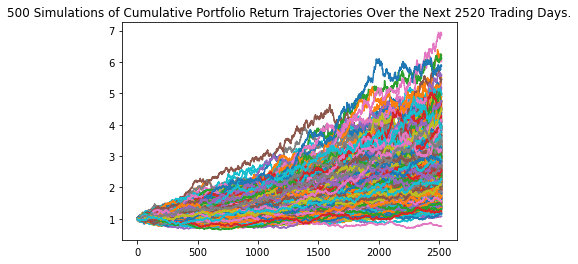

In [66]:
# Plot simulation outcomes
line_plot_ten = MC_sim_ten.plot_simulation()

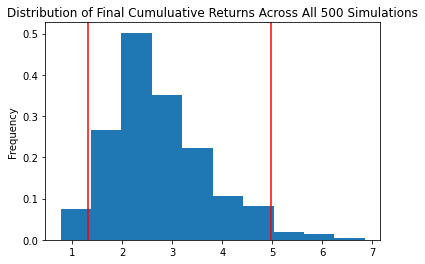

In [67]:
dist_plot_ten = MC_sim_ten.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_sim_ten.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.744663
std               0.976394
min               0.761888
25%               2.052912
50%               2.564336
75%               3.276273
max               6.854582
95% CI Lower      1.308554
95% CI Upper      4.979886
Name: 2520, dtype: float64


In [71]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $78513.25 and $298793.19
